<a href="https://colab.research.google.com/github/Uday-Teja-nex/CodEvo-Solutions/blob/main/CodEvo_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:

!pip install opencv-python numpy matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

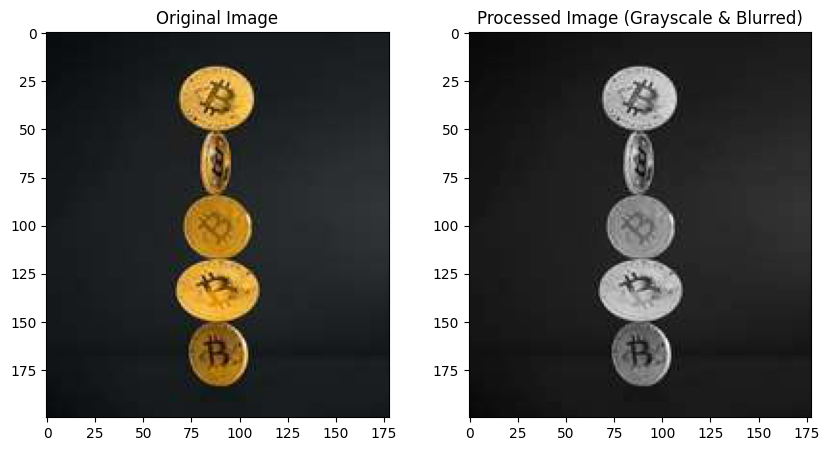

In [106]:

# Load the image
image_path = "/content/bitss.jpg"  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image was loaded successfully

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (1, 1), 0)

# Display the original and processed images (optional)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Processed Image (Grayscale & Blurred)')

plt.show()

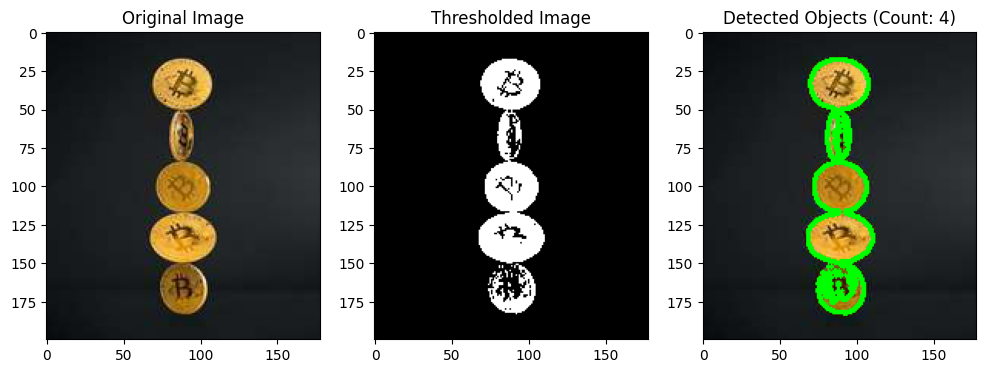

In [123]:

# Apply thresholding
_, thresholded_image = cv2.threshold(blurred_image, 100, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on the number of curves (approximation)
min_curves = 4  # Adjust this value based on the object shapes
object_count = 0
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx_contour = cv2.approxPolyDP(contour, 0.04 * perimeter, True)
    if len(approx_contour) >= min_curves :
        object_count += 1


# Draw contours on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title(f'Detected Objects (Count: {object_count})')

plt.show()